# Disney Movies Data Analysis

Disney is one of those movie companies that has left a huge impact on many people for many years and became a significant part of childhood memories.

The Walt Disney Studios has produced more than 600 great films in so many genres since the debut film Snow White and Seven Dwarf in 1937. Most of them turned into a great success in the box office while some of them did not. In this notebook, I will analyze the impact of some features in the box office success.

<img src="./disney_movies.jpg">

## Data

The dataset include all movies produced until 2016.

Data Source: https://www.kaggle.com/prateekmaj21/disney-movies  

Available features:
1. Movie Title
2. Release Date
3. Genre
4. MPAA Rating
5. Total Gross
6. Inflation Adjusted Gross

### Import

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

sns.set(style="white", context="notebook")

In [2]:
# set max row display
pd.set_option('display.max_row', 1000)

# set max column width to 50
pd.set_option('display.max_columns', 50)

### Read the Data

In [3]:
# Read the data

disney_movies_df = pd.read_csv('../disney_movies/disney_movies.csv')

In [4]:
# Create sqlite3 connection object and query object

e = pd.read_sql_query
conn = sqlite3.connect('disney_movies.db')
disney_movies_df.to_sql('disney', conn, if_exists='replace', index=False)

### Explore the Data

In [5]:
disney_movies_df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [6]:
print(f'There are {disney_movies_df.shape[0]} movies included in the dataset.')

There are 579 movies included in the dataset.


In [7]:
print(f"The oldest movie was released in {disney_movies_df['release_date'].min()}.")

The oldest movie was released in 1937-12-21.


In [8]:
print(f"The newest movie was released in {disney_movies_df['release_date'].max()}.")

The newest movie was released in 2016-12-16.


In [9]:
disney_movies_df.sort_values(by='release_date')['movie_title'].head(1)

0    Snow White and the Seven Dwarfs
Name: movie_title, dtype: object

In [10]:
disney_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
movie_title                 579 non-null object
release_date                579 non-null object
genre                       562 non-null object
mpaa_rating                 523 non-null object
total_gross                 579 non-null int64
inflation_adjusted_gross    579 non-null int64
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [11]:
disney_movies_df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [12]:
disney_movies_df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [13]:
# Fill empty values with "Other" in genre column
disney_movies_df['genre'] = disney_movies_df['genre'].fillna('Other')

In [14]:
disney_movies_df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', 'Other', 'Action',
       'Horror', 'Romantic Comedy', 'Thriller/Suspense', 'Western',
       'Black Comedy', 'Documentary', 'Concert/Performance'], dtype=object)

In [15]:
disney_movies_df['mpaa_rating'].unique()

array(['G', nan, 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

In [16]:
# Fill empty values with "Not Rated" in mpaa_rating column
disney_movies_df['mpaa_rating'] = disney_movies_df['mpaa_rating'].fillna('Not Rated')

In [17]:
disney_movies_df['mpaa_rating'].unique()

array(['G', 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

In [18]:
disney_movies_df.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [19]:
# Check total adjusted gross $$
disney_movies_df['inflation_adjusted_gross'].sum()

68763500997

In [20]:
# Check average adjusted gross $$
disney_movies_df['inflation_adjusted_gross'].mean()

118762523.31088082

In [21]:
# Check top 10 movies based on the adjusted gross revenue
disney_movies_df.sort_values(by='inflation_adjusted_gross', ascending=False).head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


### A) Movie Count vs Adjusted Gross

In [22]:
top_10_movies = e('''
                  
                         SELECT inflation_adjusted_gross, movie_title
                         FROM disney
                         ORDER BY inflation_adjusted_gross DESC
                         LIMIT 10
                         
                         ''', conn)

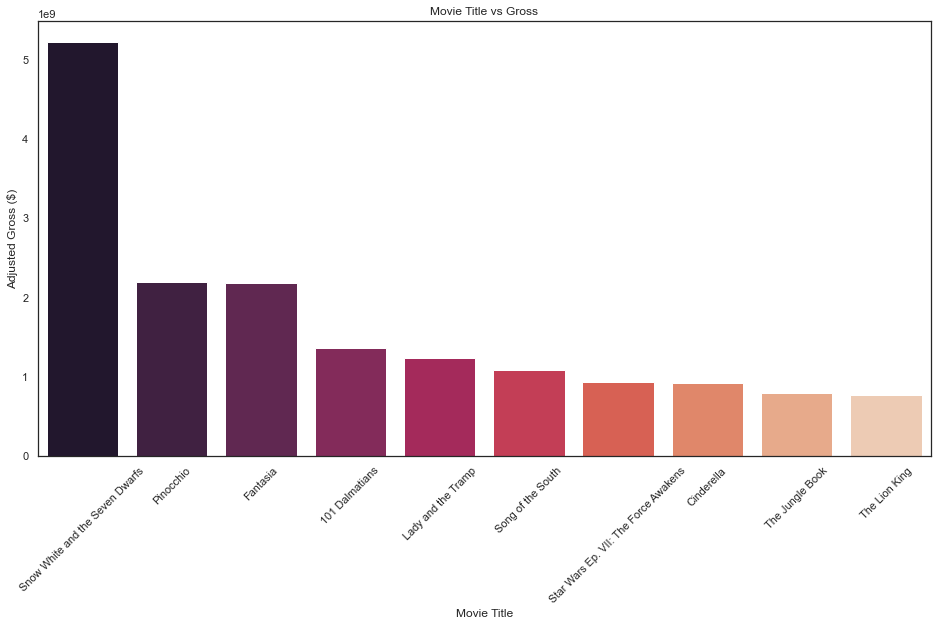

In [23]:
# Visualize top 10 grossing movies

plt.figure(figsize=(16,8))
sns.barplot(data = top_10_movies, x = 'movie_title', 
                                  y='inflation_adjusted_gross', 
                                  palette='rocket').set_title('Movie Title vs Gross')
plt.xlabel('Movie Title')
plt.ylabel('Adjusted Gross ($)')
plt.xticks(rotation=45)
plt.show()

The most successful movies are mostly Rateg G which means General audiences – All ages admitted. It's not surprising since the target audience represents a larger population.

In [24]:
# Check worst 10 movies based on the adjusted gross revenue
disney_movies_df[disney_movies_df['inflation_adjusted_gross']>0].sort_values(by='inflation_adjusted_gross', 
                                                                             ascending=True).head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984
487,Walt and El Grupo,2009-09-10,Documentary,PG,20521,23064
502,Gedo Senki (Tales from Earthsea),2010-08-13,Adventure,PG-13,48658,51988
251,The War at Home,1996-11-20,Other,R,34368,65543
280,An Alan Smithee Film: Burn Hollywood …,1998-02-27,Comedy,R,45779,82277
495,Waking Sleeping Beauty,2010-03-26,Documentary,PG,80741,86264
185,It's Pat,1994-08-26,Comedy,Not Rated,60822,125666
470,Goal! 2: Living the Dream...,2008-08-29,Drama,PG-13,225067,264247
311,Breakfast of Champions,1999-09-17,Comedy,R,178287,295851
473,Morning Light,2008-10-17,Documentary,PG,275093,322979


In [25]:
worst_10_movies = e('''
                  
                         SELECT inflation_adjusted_gross, movie_title
                         FROM disney
                         WHERE inflation_adjusted_gross > 0
                         ORDER BY inflation_adjusted_gross ASC
                         LIMIT 10
                         
                         ''', conn)

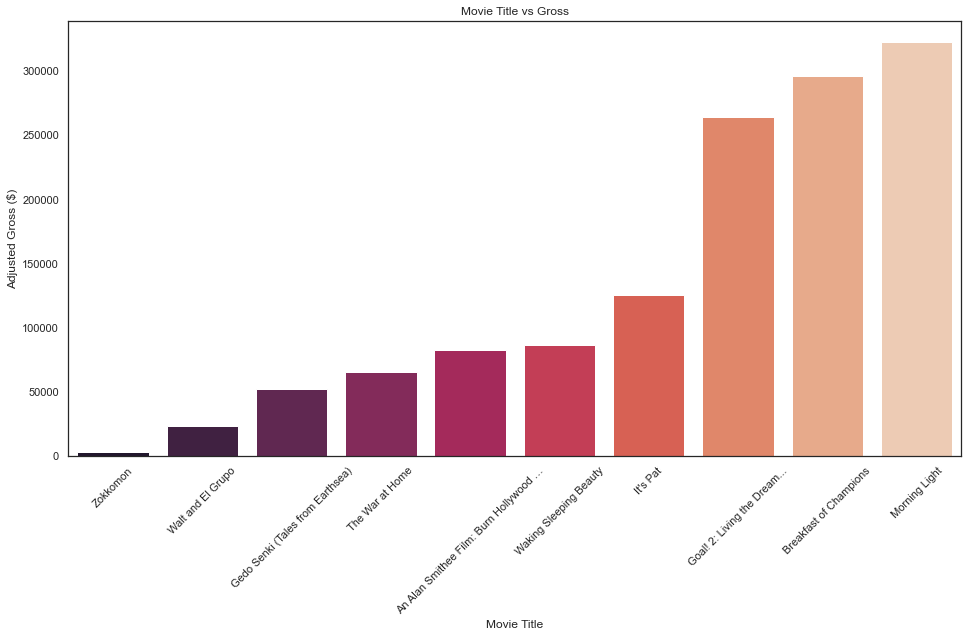

In [26]:
# Visualize least 10 grossing movies

plt.figure(figsize=(16,8))
sns.barplot(data = worst_10_movies, x = 'movie_title', 
                                  y='inflation_adjusted_gross', 
                                  palette='rocket').set_title('Movie Title vs Gross')
plt.xlabel('Movie Title')
plt.ylabel('Adjusted Gross ($)')
plt.xticks(rotation=45)
plt.show()

The least successful movies are mostly rated as PG, PG-13 or R which means the movies are not suitable for children without parental guardiance or restricted.

If we look at the genre, we can see more variance than ratings in terms of the effect on box office success. However, we can clearly state that documentaries are less popular than adventure or musical movies.

### B) Movie Count vs Genre

In [27]:
# Check number of movies per genre

num_movies_per_genre = e('''
                
                    SELECT genre, COUNT(movie_title) AS movie_count
                    FROM disney
                    GROUP BY genre
                    ORDER BY movie_count
                    
                    ''', conn)

In [28]:
num_movies_per_genre

,genre,movie_count
0,Concert/Performance,2
1,Black Comedy,3
2,Horror,6
3,Western,7
4,Documentary,16
5,Musical,16
6,None,17
7,Romantic Comedy,23
8,Thriller/Suspense,24
9,Action,40


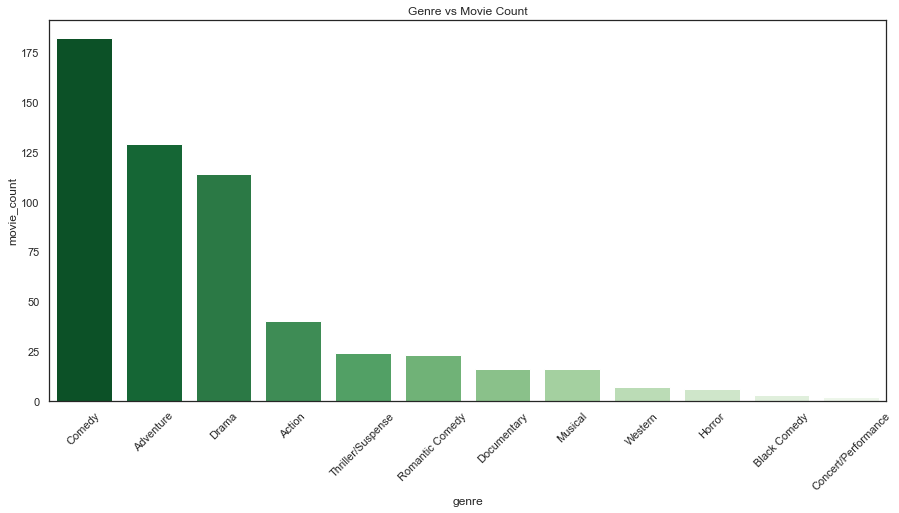

In [29]:
# Visualize genre vs movie count

plt.figure(figsize=(15,7))
sns.barplot(data = num_movies_per_genre.sort_values('movie_count', ascending=False), 
            x = 'genre', 
            y = 'movie_count',
            palette = 'Greens_r'
           ).set_title('Genre vs Movie Count')
plt.xticks(rotation=45)
plt.show()

### C) Average Adjusted Gross vs Genre

In [30]:
# Check average gross per genre

avg_gross_per_genre = e('''
                
                    SELECT genre, AVG(inflation_adjusted_gross) AS avg_gross
                    FROM disney
                    GROUP BY genre
                    ORDER BY avg_gross
                    
                    ''', conn)

In [31]:
avg_gross_per_genre.round()

,genre,avg_gross
0,Documentary,12718026.0
1,None,21623728.0
2,Horror,23413849.0
3,Black Comedy,52243492.0
4,Concert/Performance,57410839.0
5,Drama,71893022.0
6,Western,73815707.0
7,Romantic Comedy,77777084.0
8,Comedy,84667730.0
9,Thriller/Suspense,89653790.0


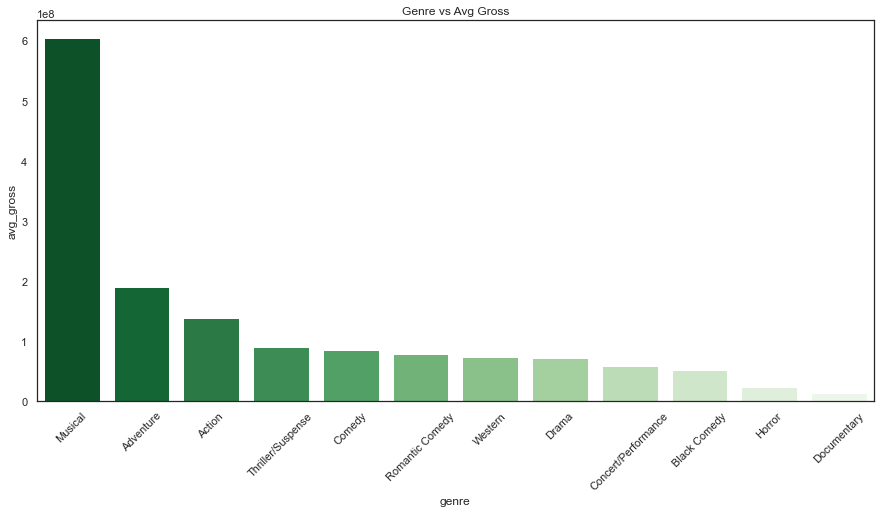

In [32]:
# Visualize genre vs average gross

plt.figure(figsize=(15,7))
sns.barplot(data = avg_gross_per_genre.sort_values('avg_gross', ascending=False), 
            x = 'genre', 
            y = 'avg_gross',
            palette = 'Greens_r'
           ).set_title('Genre vs Avg Gross')
plt.xticks(rotation=45)
plt.show()

Even though musical movies are not produced very often, they bring the highest gross revenue.

### D) Movie Count vs MPAA Rating

In [33]:
# Check number of movies per rating

num_movies_per_rating = e('''
                
                    SELECT mpaa_rating, COUNT(movie_title) AS movie_count
                    FROM disney
                    GROUP BY mpaa_rating
                    ORDER BY movie_count
                    
                    ''', conn)

In [34]:
num_movies_per_rating

,mpaa_rating,movie_count
0,Not Rated,3
1,None,56
2,G,86
3,R,102
4,PG-13,145
5,PG,187


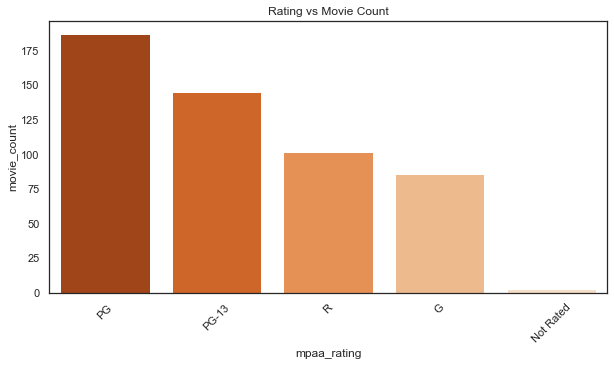

In [35]:
# Visualize rating vs movie count

plt.figure(figsize=(10,5))
sns.barplot(data = num_movies_per_rating.sort_values('movie_count', ascending=False), 
            x = 'mpaa_rating', 
            y = 'movie_count',
            palette = 'Oranges_r'
           ).set_title('Rating vs Movie Count')
plt.xticks(rotation=45)
plt.show()

### E) Adjusted Gross vs MPAA Rating

In [36]:
# Check average gross per rating

avg_gross_per_rating = e('''
                
                    SELECT mpaa_rating, AVG(inflation_adjusted_gross) AS avg_gross
                    FROM disney
                    GROUP BY mpaa_rating
                    ORDER BY avg_gross
                    
                    ''', conn)

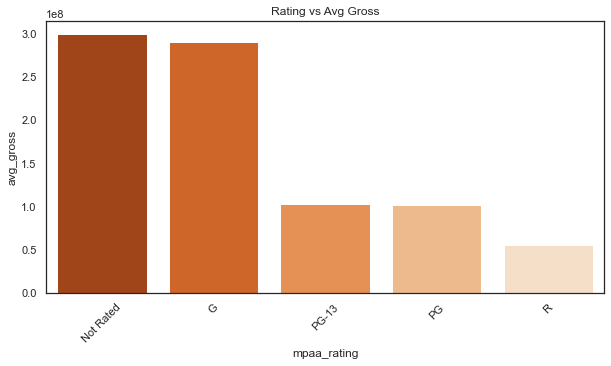

In [37]:
# Visualize rating vs average gross

plt.figure(figsize=(10,5))
sns.barplot(data = avg_gross_per_rating.sort_values('avg_gross', ascending=False), 
            x = 'mpaa_rating', 
            y = 'avg_gross',
            palette = 'Oranges_r'
           ).set_title('Rating vs Avg Gross')
plt.xticks(rotation=45)
plt.show()

### F) Release Year vs Genre

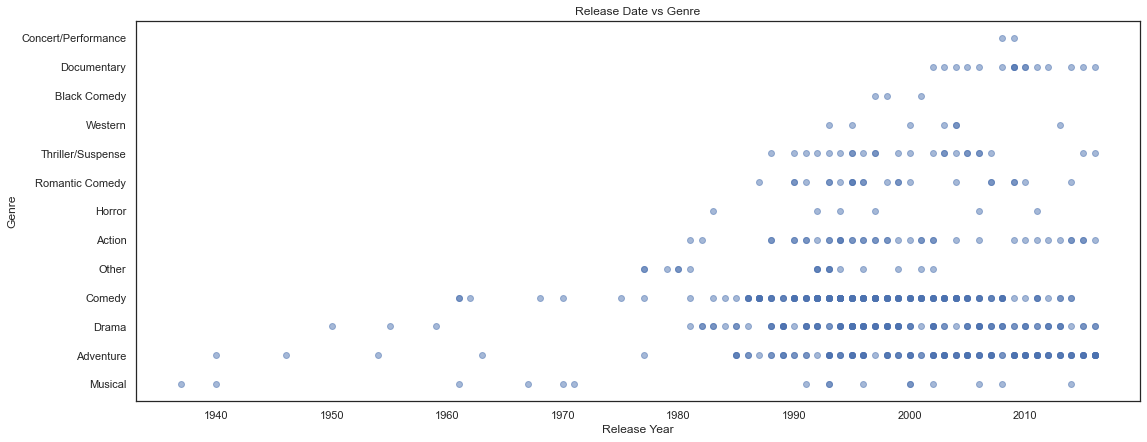

In [38]:
# Visualize Release Year vs Genre 

plt.figure(figsize=(18,7))
plt.scatter(pd.DatetimeIndex(disney_movies_df['release_date']).year, disney_movies_df['genre']
, alpha=0.5)
plt.title('Release Date vs Genre')
plt.ylabel('Genre')
plt.xlabel('Release Year')

plt.show()

### G) Release Year vs Adjusted Gross

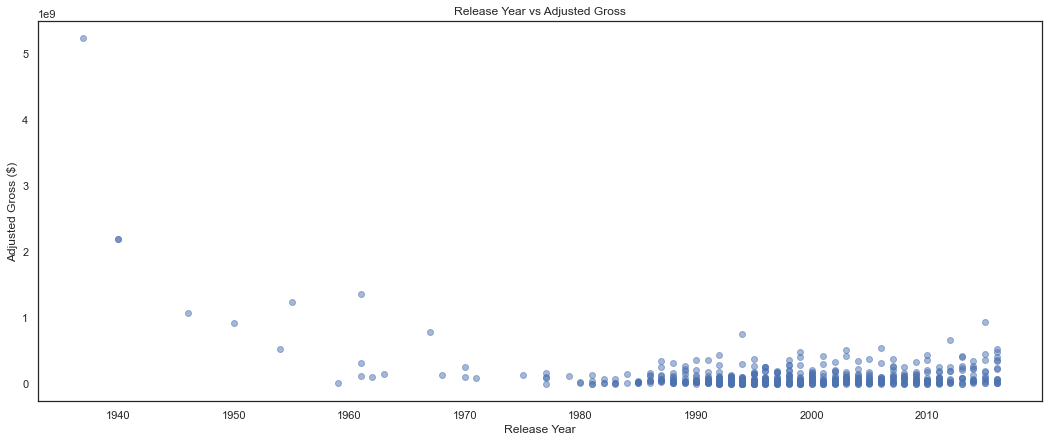

In [39]:
# Visualize Release Year vs Adjusted Gross 

plt.figure(figsize=(18,7))
plt.scatter(pd.DatetimeIndex(disney_movies_df['release_date']).year, disney_movies_df['inflation_adjusted_gross']
, alpha=0.5)
plt.title('Release Year vs Adjusted Gross')
plt.ylabel('Adjusted Gross ($)')
plt.xlabel('Release Year')

plt.show()

Highest grossing movies were produced before 1970s while newer movie are mostly brought less than $1B in revenue. As people have started owning a television, more movies were produced and the box office revenue of movies was dropped.

### Feature Engineering

There are two categorical variables: Genre and MPAA Rating
We need to convert them to dummy variable so that we can inspect the correlation between these features and the target variable "Adjusted Gross".

In [40]:
# Convert genre to dummy variables 
genre_dummies =  pd.get_dummies(disney_movies_df['genre'])

# Check first 5 rows of genre_dummies
genre_dummies.head()

,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Other,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
# Convert mpaa_rating to dummy variables 
genre_dummies =  pd.get_dummies(disney_movies_df['mpaa_rating'])

# Check first 5 rows of genre_dummies
genre_dummies.head()

,G,Not Rated,PG,PG-13,R
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [42]:
disney_movies_df = pd.get_dummies(disney_movies_df,
                          columns=['genre', 'mpaa_rating'])

In [43]:
disney_movies_df.head()

,movie_title,release_date,total_gross,inflation_adjusted_gross,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Other,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,mpaa_rating_G,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R
0,Snow White and the Seven Dwarfs,1937-12-21,184925485,5228953251,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,Pinocchio,1940-02-09,84300000,2188229052,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Fantasia,1940-11-13,83320000,2187090808,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,Song of the South,1946-11-12,65000000,1078510579,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Cinderella,1950-02-15,85000000,920608730,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [44]:
disney_movies_df.columns

Index(['movie_title', 'release_date', 'total_gross',
       'inflation_adjusted_gross', 'genre_Action', 'genre_Adventure',
       'genre_Black Comedy', 'genre_Comedy', 'genre_Concert/Performance',
       'genre_Documentary', 'genre_Drama', 'genre_Horror', 'genre_Musical',
       'genre_Other', 'genre_Romantic Comedy', 'genre_Thriller/Suspense',
       'genre_Western', 'mpaa_rating_G', 'mpaa_rating_Not Rated',
       'mpaa_rating_PG', 'mpaa_rating_PG-13', 'mpaa_rating_R'],
      dtype='object')

In [52]:
disney_movies_df['release_year'] = pd.DatetimeIndex(disney_movies_df['release_date']).year

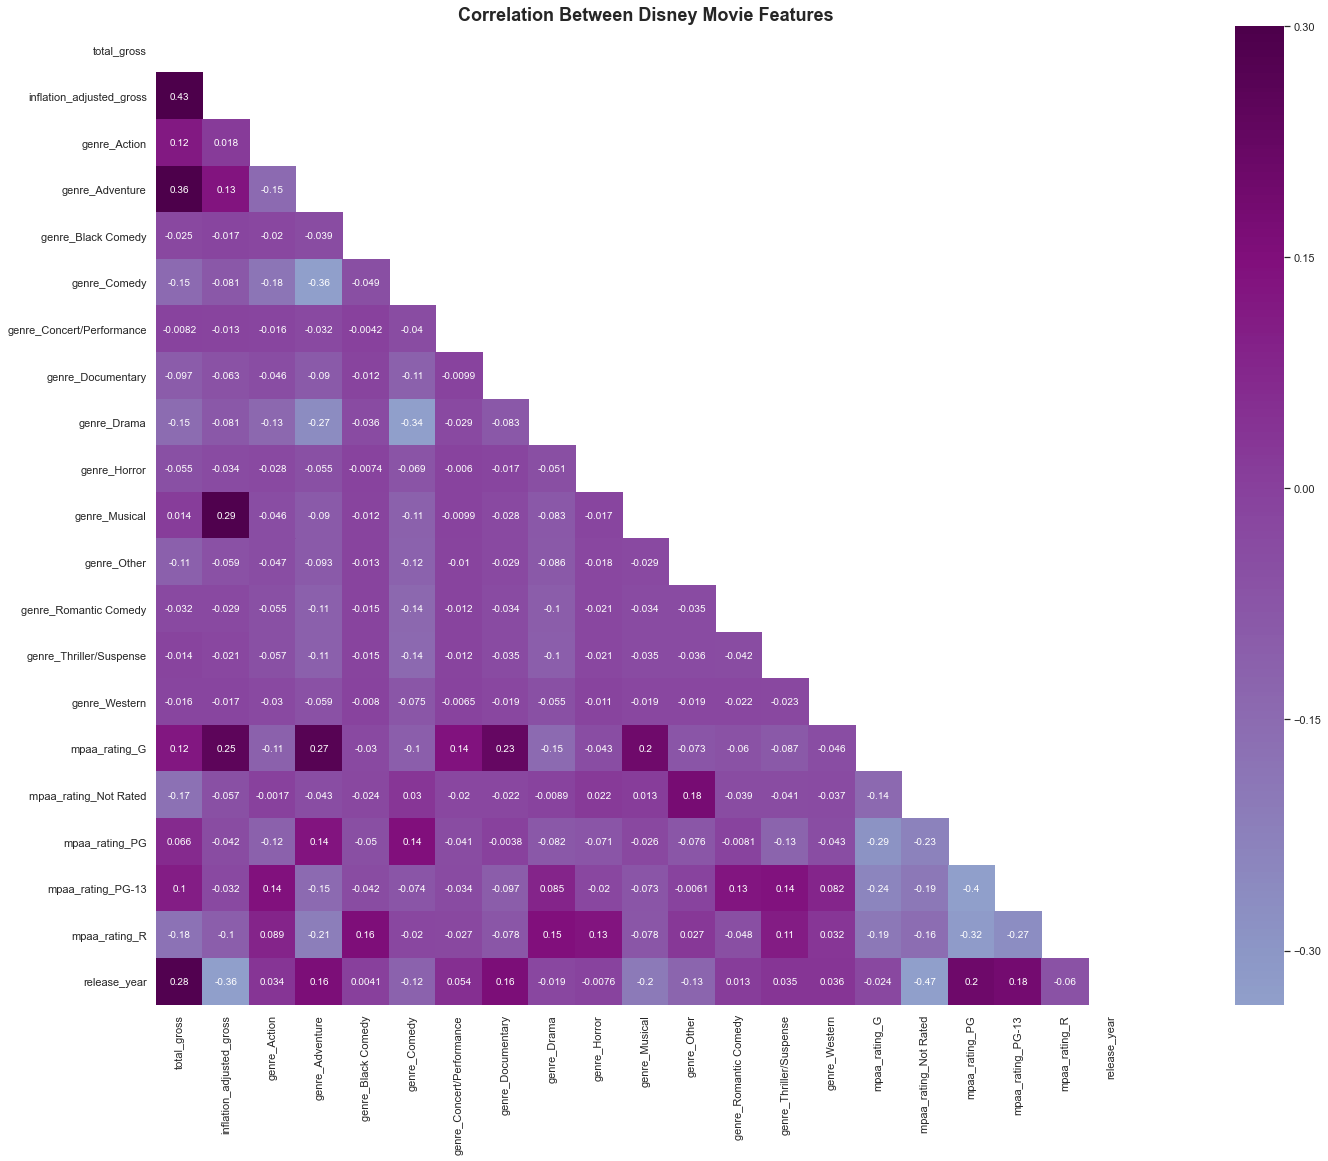

In [53]:
plt.figure(figsize=(36,18))

mask = np.zeros_like(disney_movies_df.corr())
mask[np.triu_indices_from(mask)] = True

ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(disney_movies_df.corr(), mask=mask, vmax=.3, square=True, annot=True, cmap="BuPu", robust=True, ax=ax, center=-0.3)

    ax.set_title('Correlation Between Disney Movie Features', fontsize=18, weight='bold')

Some insights from the correlation map:  
    - Musicals and adventures are the highest grossing genres.
    - G rated movies are the most successful.  
    - G rated movies are either adventure, documentary or musical.
    - Dramas, comedies, and documentaries are least successful.
    - Movies with restricted rating (PG, PG-13, R) are least successful. 
    - Rating is important in box office success as not rated movies are below the average.
    - There is a negative correlation between release year and the gross revenue. (-36%)